In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
from multiprocessing import freeze_support
from collections import Counter

# 데이터정리

In [2]:
data=pd.read_csv('comment_all_전독시.csv', encoding='utf-8-sig', engine='python')
del data['Unnamed: 0']
data.rename(columns = {'0' : 'comment'}, inplace = True) # inplace = True이거 안하고 하면 키로 인식이 되지 않는듯

In [ ]:
# 중복 , 널값, 특수문자 제거

In [3]:
print('댓글 개수 :',len(data))
data['comment'].nunique() # 중복인 것 4000개정도

댓글 개수 : 122962


118234

In [4]:
data.drop_duplicates(subset=['comment'], inplace=True) #중복삭제
print('총 댓글 수 :',len(data))

총 댓글 수 : 118234


In [5]:
data['comment'] = data['comment'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")# 한글과 공백을 제외하고 모두 제거
data['comment'].replace('', np.nan, inplace=True)# 널값 제거하기 위해 빈 칸은 널값을 넣어주고 개수 확인하기
data.loc[data.comment.isnull()] # null값이 있는 위치 

,comment
340,NaN
421,NaN
512,NaN
674,NaN
871,NaN
1514,NaN
1856,NaN
2073,NaN
2076,NaN
2082,NaN


In [6]:
data = data.dropna(how = 'any') # Null 값이 존재하는 행 제거

# 품사 정보 부착

In [7]:
okt = Okt()

In [8]:
pos_comment = []
for comment in data['comment']:
    pos_temp = okt.pos(comment, norm=True, stem=True)
    pos_comment.append(pos_temp)
    
print(pos_comment[3])

[('하루', 'Noun'), ('에', 'Josa'), ('코인', 'Noun'), ('지불', 'Noun'), ('하다', 'Verb'), ('되다', 'Verb'), ('보상', 'Noun'), ('은', 'Josa'), ('코인', 'Noun'), ('에', 'Josa'), ('난이도', 'Noun'), ('급', 'Noun'), ('인', 'Josa'), ('일간', 'Noun'), ('지속', 'Noun'), ('되다', 'Verb'), ('시나리오', 'Noun'), ('말', 'Noun'), ('이', 'Josa'), ('되다', 'Verb'), ('건가', 'Noun')]


In [9]:
# 명사 추출 확인
pos_comment_noun = []
for item in pos_comment:
    for word, pos in item:
        if pos == 'Noun':  # 명사만 추출
            pos_comment_noun.append(word)

print(pos_comment_noun[:100])

['낄낄', '거린', '사람', '손', '유', '중혁', '김', '독자', '케미', '티키타카', '최고', '임', '하루', '코인', '지불', '보상', '코인', '난이도', '급', '일간', '지속', '시나리오', '말', '건가', '여러분', '누가', '좀', '기절', '개월', '뒤', '거', '진짜', '시즌', '진짜', '유', '중혁', '주인공', '만화', '시즌', '김', '독자', '만화', '지하철', '다가', '사건', '진짜', '더', '성좌', '반응', '때', '젤', '지혜', '표정', '성좌', '주인공', '절대', '인간', '독자', '무기', '준비', '싸움', '아주', '싸움', '유', '중혁', '회귀', '여기', '사람', '임', '유', '중혁', '사람', '안', '뭐', '미래', '사람', '막', '갑자기', '궁금', '우리', '중혁', '때', '싸이코', '페스', '스포', '저건', '회', '차야', '중혁', '무림', '만두', '성장', '속도', '회', '때문', '베뎃', '개', '유', '중혁', '개끼']


In [35]:
# 명사 개수확인
stopwords = ['진짜', '존나', '좀', '정말', '왜', '그냥', '것', '개', '뭐', '사람', '놈', '너', '걍', '잘', '임', '제발']
count = Counter(pos_comment_noun)
return_contents = []
return_count = []

stop_flag = True # 초기에 True로 설정
for n, c in count.most_common(30):  # 탑 30 명사만 추출
    temp = {'tag': n, 'count': c}
    for stopword in stopwords :
        if (stopword == n) : # 불용어와 같다면 
            stop_flag = False 
            break
    if stop_flag == True : # 위에 if문에 걸리지 않았다는 것은 지정된 불용어와 같지 않다는 뜻으로 True일 것.
        if len(n) > 1 : # 두 글자 이상이면
            return_contents.append(n)
            return_count.append(c)
        
    stop_flag = True

# 자주 나오는 단어들 중 불용어가 아니고, 두 글자 이상인 것들
print(return_contents)
print(return_count)

['독자', '소설', '스포', '웹툰', '중혁', '독시', '작가', '댓글', '생각', '도깨비', '사랑', '성좌', '보고', '주인공']
[19236, 13257, 10568, 8796, 7776, 5608, 5593, 4186, 4162, 3468, 3356, 3305, 3254, 3131]


In [11]:
import matplotlib.pyplot as plt

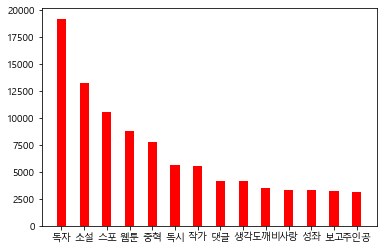

In [47]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

x = np.arange(len(return_contents))

plt.bar(x, return_count, color ='red', width = 0.4)
plt.xticks(x, return_contents)
plt.show()

# 명사 클라우드 확인

In [11]:
str_noun_words = ','.join(pos_comment_noun)
FONT_PATH = 'C:/Windows/Fonts/malgun.ttf'

In [12]:
stopwords = ['진짜', '존나', '좀', '정말', '왜', '그냥', '것', '개', '뭐', '사람', '놈', '너', '걍', '잘', '임', '제발']

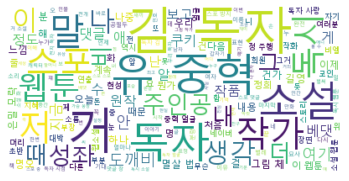

In [15]:
wordcloud = WordCloud(collocation_threshold =30, max_font_size=60, stopwords=stopwords, background_color="white", font_path=FONT_PATH).generate(str_noun_words)

plt.figure()
plt.imshow(wordcloud, interpolation='bilinear') # 가장 간단한 방법인 bilinear(Nearest는 화질이 떨어짐)
plt.axis("off")
plt.show()